# 一、生成数据集

In [1]:
import numpy as np
import torch
from torch.utils import data
from d2l import torch as d2l

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = d2l.synthetic_data(true_w, true_b, 1000)

可视化:

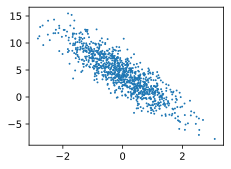

In [2]:
d2l.set_figsize()
d2l.plt.scatter(features[:, (1)].detach().numpy(), labels.detach().numpy(), 1);

# 二、读取数据集

In [3]:
def load_array(data_arrays, batch_size, is_train=True):  #@save
    """构造一个PyTorch数据迭代器"""
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)

batch_size = 10
data_iter = load_array((features, labels), batch_size)

# 三、定义模型

可以使用框架预先定义好的层，以简化代码编写。

[Sequential类](./Linear_Regression.ipynb)将多个层串联在一起。当给定输入数据时，将传入第一层，产生的输出又会作为第二层的输入，以此类推。

In [4]:
from torch import nn
net = nn.Sequential(nn.Linear(2, 1)) # 参数“2”：输入特征形状；特征“1”：输出特征形状

# 四、初始化模型参数

1. 使用`net[0]`选择网络中的第一个图层
2. 使用`weight.data`(权重)和`bias.data`(偏移量)方法访问参数
3. 使用`normal_`和`fill_`方法重写参数值

In [5]:
net[0].weight.data.normal_(0, 0.01)
net[0].bias.data.fill_(0)

tensor([0.])

# 五、定义损失参数

使用`MSELoss`类计算均方误差（也称为$L_2$范数），默认返回所有样本的损失值。

In [6]:
loss = nn.MSELoss()

# 六、定义优化算法

在`optim`模块中实现了小批量随机梯度下降算法的许多变种，包括`SGD`类（和之前定义的`sgd()`函数效果相同）。需要传入要优化的参数和超参数字典。

In [7]:
trainer = torch.optim.SGD(net.parameters(), lr=0.03)

# 七、训练

In [8]:
num_epochs = 3
for epoch in range(num_epochs):
    for X, y in data_iter:
        l = loss(net(X), y)
        trainer.zero_grad()
        l.backward()
        trainer.step()
    l = loss(net(features), labels)
    print(f'epoch {epoch + 1}, loss {l:f}')

epoch 1, loss 0.000314
epoch 2, loss 0.000106
epoch 3, loss 0.000106


最后查看训练得到的权重和偏置。

In [9]:
w = net[0].weight.data
print('w的估计误差：', true_w - w.reshape(true_w.shape))
b = net[0].bias.data
print('b的估计误差：', true_b - b)

w的估计误差： tensor([-0.0001,  0.0004])
b的估计误差： tensor([0.0004])
